# k- 최근접 이웃 회귀

In [1]:
# 이제 농어를 무게 단위로 판다!
# 근데 무게를.. 잘못쟀다!
# 길이, 높이, 두께 데이터로 무게를 예측하는 모델을 만들자. 

In [3]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

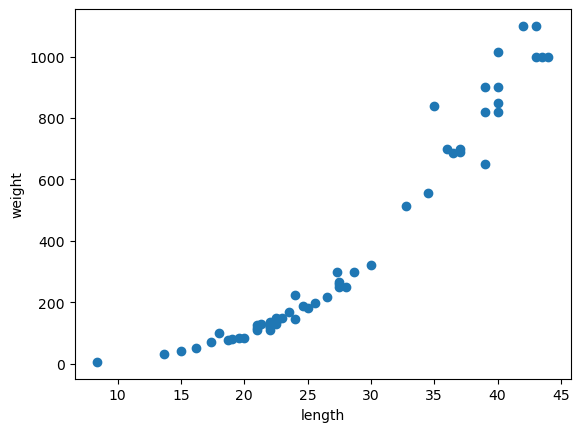

In [5]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [7]:
train_input

array([39. , 27.3, 35. , 36.5, 39. , 21. , 24. , 22.5, 22. , 34.5,  8.4,
       22. , 39. , 43. , 21. , 22. , 30. , 21. , 23. , 24. , 37. , 19. ,
       40. , 17.4, 16.2, 21.3, 22.5, 37. , 28. , 22. , 27.5, 22.7, 40. ,
       40. , 15. , 28.7, 18.7, 19.6, 24.6, 42. , 26.5, 27.5])

* 현재 input으로 넣을 데이터의 형태를 보면 알겠지만, 이는 1차원 배열이다.
* 아래의 방식으로 배열의 상태를 확인할 수 있다.

In [8]:
print(train_input.shape)

(42,)


* 위를 보면 1차원 배열이어서 콤마 뒤에 숫자가 없다는 것을 볼 수 있다.
* 사이킷런에 넣는 배열은 2차원이어야 하므로, 강제로 2차원배열로 만들어주도록 하자.

In [9]:
# 이럴 떄는 reshape를 사용할 수 있다.
test_array = np.array([1,2,3,4])
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [10]:
test_array

array([[1, 2],
       [3, 4]])

In [11]:
# 이를 활용해 train input과 test input 을 reshape 하면 된다. 직접 찍어보면 원소가 42개인것을 알 수 있다.
train_input.reshape(42,1)

array([[39. ],
       [27.3],
       [35. ],
       [36.5],
       [39. ],
       [21. ],
       [24. ],
       [22.5],
       [22. ],
       [34.5],
       [ 8.4],
       [22. ],
       [39. ],
       [43. ],
       [21. ],
       [22. ],
       [30. ],
       [21. ],
       [23. ],
       [24. ],
       [37. ],
       [19. ],
       [40. ],
       [17.4],
       [16.2],
       [21.3],
       [22.5],
       [37. ],
       [28. ],
       [22. ],
       [27.5],
       [22.7],
       [40. ],
       [40. ],
       [15. ],
       [28.7],
       [18.7],
       [19.6],
       [24.6],
       [42. ],
       [26.5],
       [27.5]])

In [12]:
# 하지만, 직접 확인하고 42개구나~ 하고 찍지 않아도 -1을 넣어주면 자동으로 찍어준다.
# 잘 되었음을 알 수 있다. 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수..?
* 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor 이다. 

In [13]:
# k- 최근접 이웃 회귀 알고리즘으로 트레인 셋을 학습시켰다. 

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
knr.score(test_input, test_target)

0.978224096186441

* 일단 점수는 나오는데.. 이 점수는 무슨 점수인가? 회귀에서는 정답을 맞췄다는 것이 없다... 
* 여기 나오는 이 점수를 바로 결정계수 (R^2) 라고 한다. 
* 모델이 타깃의 평균 정도 예측하는 수준이면 결정계수는 낮아진다.
* 모델의 예측이 타깃에 매우 가까워지면 1에 가까워진다. 

In [15]:
# mean_absolute_error 는 타겟과 예측의 절댓값 오차를 평균해 반환한다.

from sklearn.metrics import mean_absolute_error

# 테스트 셋에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 셋에 대한 평균 절댓값 오차를 계싼한다.

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

33.65571428571428


In [16]:
# 위의 결과를 통해 예측이 평균적으로 33g 정도 타깃과 다르다는 것을 알 수 있다. 

In [17]:
# 그런데 여기서 기존 훈련세트로 평가를 해 보면 어떨까? score에 테스트 말고 트레인셋도 넣어보자.
knr.score(train_input, train_target)

0.9669253864326516

* 뭔가 이상하다. 훈련셋으로 훈련을 시켜놓았는데, 테스트셋보다 훈련셋으로 돌렸을 때 결정계수가 더 낮게 나와버린다.
* 이러한 상태를 과소적합되었다고 말할 수 있다.
* 훈련셋에서 점수가 좋았는데, 테스트셋에서 점수가 나쁘다면 그것은 과대적합.
* 훈련셋보다 테스트셋의 점수가 더 높아버리거나, 두 점수가 모두 너무 낮은 경우 과소적합.
* 과소적합은 훈련셋과 테스트셋의 크기가 매우 작아서 일어날 수 있다고 한다.

* 이러한 과소적합 문제를 해결하기 위해서는 모델을 조금 더 복잡하게 만들면 된다고 한다.
* k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만들려면 이웃 k의 갯수를 줄이면 된다고 한다. 
* 기본값은 5이므로 3으로 낮춰 보자

In [26]:
knr.n_neighbors = 3

In [27]:
# 모델 재훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [28]:
knr.score(train_input, train_target)

0.9787630770219441

In [29]:
knr.score(test_input, test_target)

0.9828040455772086

In [30]:
# 아직 과소적합 상태이므로 2로 줄어보자...

In [31]:
knr.n_neighbors = 2

In [32]:
# 모델 재훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=2)

In [33]:
knr.score(train_input, train_target)

0.9809317978360508

In [34]:
knr.score(test_input, test_target)

0.955048251768517

* 이제 과소적합 문제는 해결되었다.. 하지만 두 점수 차가 좀 큰 것 같지 않은가..? 
* 책에서는 랜덤스테이트42를 줬기때문에 일정 값으로 나와있다. 일단은 최적의 n_neighbors 를 찾는 방법이 나중에 소개된다 한다.

In [35]:
# 과대적합, 과소적합에 대해 조금 더 이해해보자.

knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만든다.

x = np.arange(5,45).reshape(-1,1)

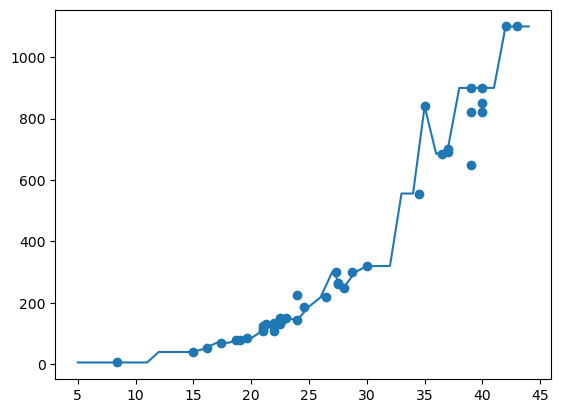

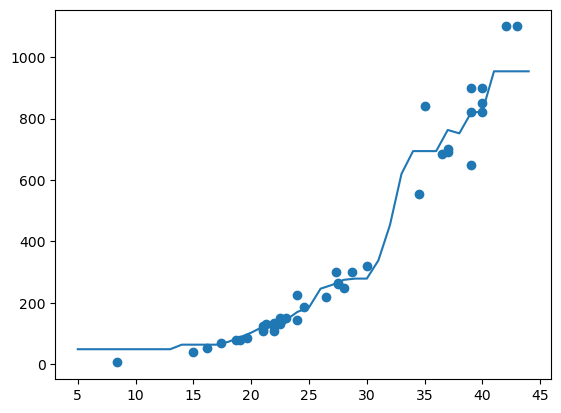

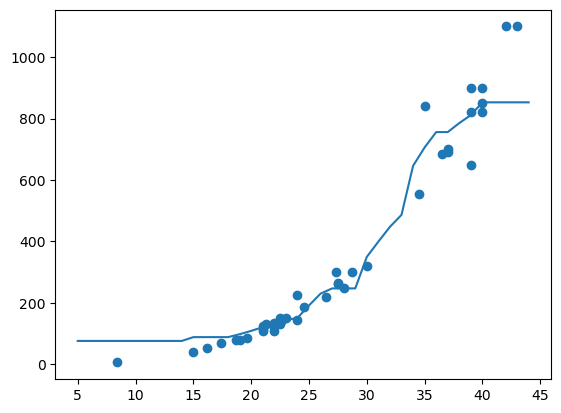

In [39]:
# n = 1, 5, 10일떄 예측 결과를 그래프로 그리기
# n이 커짐에 따라 모델이 점점 단순해진다..

for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.show()